# Cleaning and Understanding Car Accidents Data Set

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import os
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

## Importing Data

In [61]:
#Creating path
path = r'C:\Users\ariel\OneDrive\Desktop\School work\Achievement 6'

In [3]:
# Importing Data Set
cardata = pd.read_csv(os.path.join(path, 'Data', 'US_Accidents_March23.csv'), index_col=False)

## Structure of Data

In [4]:
cardata.head()

ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          False        False          Night   
1   False  False           False          False        False          Night   
2   False  False           False           True        False          Night   
3   False  False           False          False        False          Night   
4   False  False           False           True        False            Day   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                   Day  
2          Night               Day                   Day  
3            Day               Day                   Day  
4            Day               Day                   Day  

[5 rows x 46 columns]

In [5]:
cardata.shape

(7728394, 46)

In [6]:
cardata.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [7]:
cardata.info

<bound method DataFrame.info of                 ID   Source  Severity           Start_Time  \
0              A-1  Source2         3  2016-02-08 05:46:00   
1              A-2  Source2         2  2016-02-08 06:07:59   
2              A-3  Source2         2  2016-02-08 06:49:27   
3              A-4  Source2         3  2016-02-08 07:23:34   
4              A-5  Source2         2  2016-02-08 07:39:07   
...            ...      ...       ...                  ...   
7728389  A-7777757  Source1         2  2019-08-23 18:03:25   
7728390  A-7777758  Source1         2  2019-08-23 19:11:30   
7728391  A-7777759  Source1         2  2019-08-23 19:00:21   
7728392  A-7777760  Source1         2  2019-08-23 19:00:21   
7728393  A-7777761  Source1         2  2019-08-23 18:52:06   

                    End_Time  Start_Lat   Start_Lng   End_Lat    End_Lng  \
0        2016-02-08 11:00:00  39.865147  -84.058723       NaN        NaN   
1        2016-02-08 06:37:59  39.928059  -82.831184       NaN        Na

## Data Types

In [8]:
print(cardata.dtypes)

ID                        object
Source                    object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Street                    object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                     bool
Bump      

In [9]:
#Checking for mixed data types in the columns
def check_mixed_types(df):
    mixed_columns = []
    for column in cardata.columns:
        unique_types = cardata[column].apply(type).nunique()
        if unique_types > 1:
            mixed_columns.append(column)
    return mixed_columns

In [10]:
mixed_columns = check_mixed_types(cardata)
print(f"Columns with mixed data types: {mixed_columns}")

Columns with mixed data types: ['Description', 'Street', 'City', 'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


In [11]:
# Re-checking for mixed data types after handling missing values
mixed_columns = check_mixed_types(cardata)
print(f"Columns with mixed data types: {mixed_columns}")

Columns with mixed data types: ['Description', 'Street', 'City', 'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


## Missing Values

In [12]:
# Checking for missing values
print(cardata.isnull().sum())

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [13]:
# Imputing 'Unknown" into missing values in 'Description' Column
cardata['Description'] = cardata['Description'].fillna('Unknown')

In [14]:
# Checking rows where city and zipcode are missing
missing_city_zipcode = cardata[cardata['City'].isna() | cardata['Zipcode'].isna()]

In [15]:
missing_city_zipcode[['City', 'Zipcode']]

City Zipcode
7794            Southeast Marin     NaN
13889           Southeast Marin     NaN
14515           Southeast Marin     NaN
16208           Southeast Marin     NaN
23539                 San Mateo     NaN
...                         ...     ...
7722065  District 4 Kent Island     NaN
7723723                Pinkhams     NaN
7724048    Springville-Mapleton     NaN
7724049    Springville-Mapleton     NaN
7726723           North Bayside     NaN

[2166 rows x 2 columns]

In [16]:
# Imputing 'Unknown' into missing values for 'City' column
cardata['City'] = cardata['City'].fillna('Unknown')

In [17]:
# Imputing 'Unknown' into missing values for 'Zipcode' column
cardata['Zipcode'] = cardata['Zipcode'].fillna('Unknown')

In [18]:
#Dropping 'End_Lat' and 'End_Lng' columns 
cardata.drop(columns=['End_Lat', 'End_Lng'], inplace=True)

In [19]:
# 'Street' values are crucial. Removing rows with missing street values
cardata.dropna(subset=['Street'], inplace=True)

In [20]:
# Drop the specified columns
cardata.drop(columns=['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'], inplace=True)

In [21]:
# Drop the specified columns
cardata.drop(columns=['Timezone', 'Airport_Code', 'Weather_Timestamp', 'Wind_Direction'], inplace=True)

## Determining imputation method for missing numerical values

In [22]:
# List of columns to check skewness
columns_to_check = [
    'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
    'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)'
]

In [23]:
# Calculate skewness for each column
skewness = cardata[columns_to_check].skew()

In [24]:
# Display skewness values
print(skewness)

Temperature(F)       -0.513824
Wind_Chill(F)        -0.672655
Humidity(%)          -0.394866
Pressure(in)         -3.640160
Visibility(mi)        2.321002
Wind_Speed(mph)       8.050989
Precipitation(in)    85.952165
dtype: float64


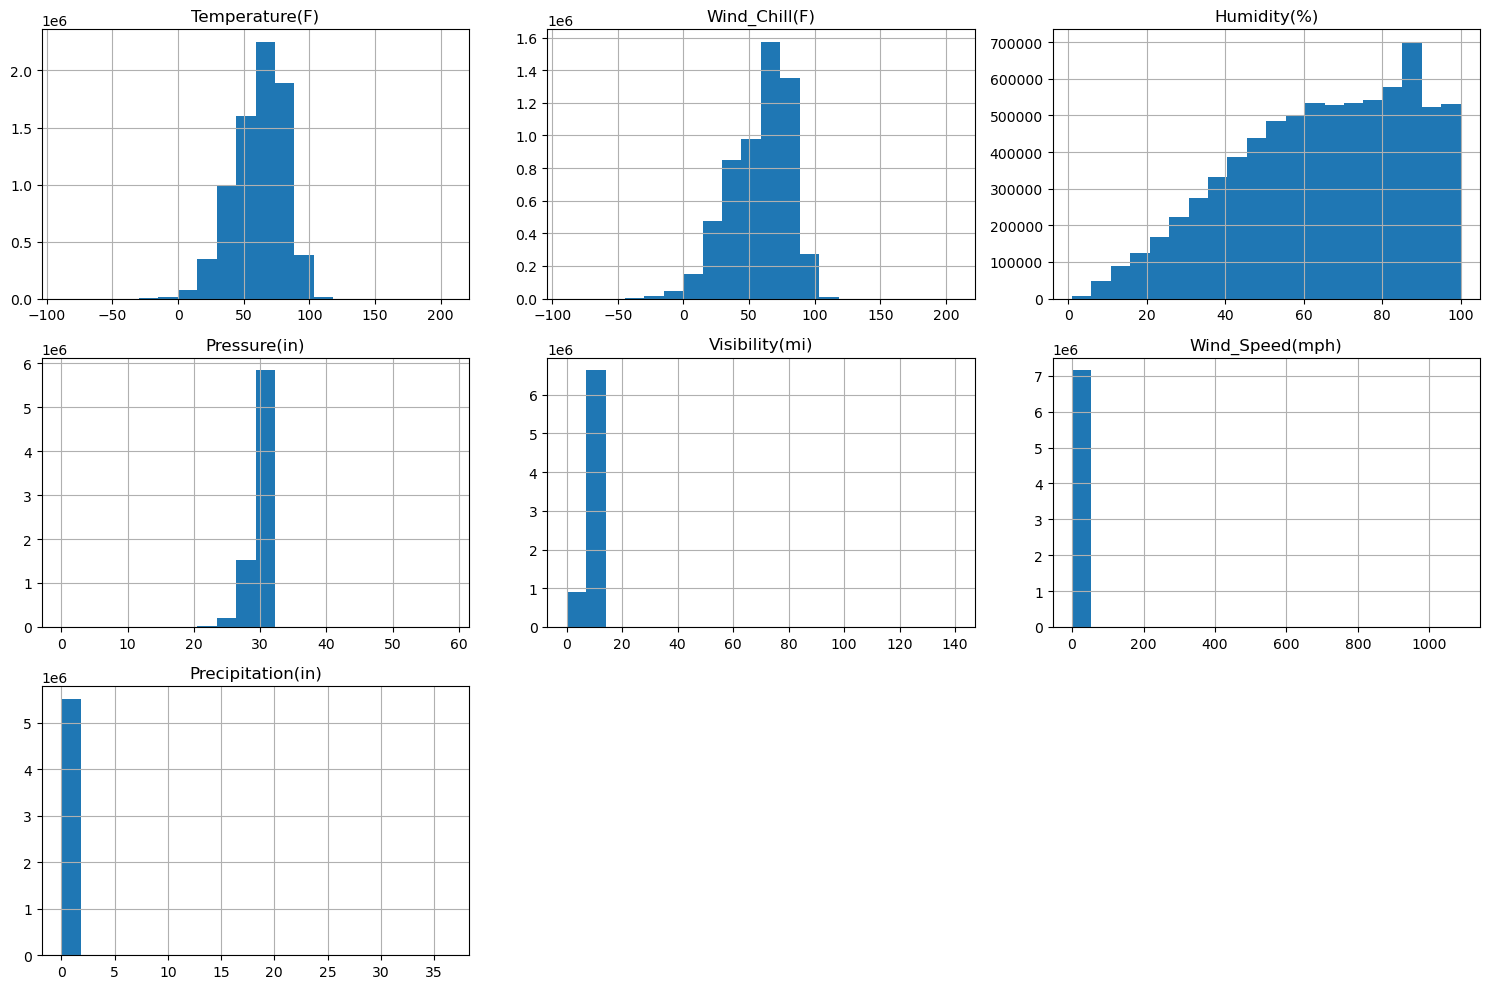

In [25]:
cardata[columns_to_check].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [26]:
# Imputing missing values with the mean for 'Temperature', 'Wind Chill', Humidity' columns
columns_to_impute = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)']

In [27]:
cardata[columns_to_impute] = cardata[columns_to_impute].fillna(cardata[columns_to_impute].mean())

In [28]:
# Imputing missing values with the median for 'Pressure', 'Visibility', 'Wind Speed', and 'Precipitation' columns
columns_to_impute_median = ['Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

In [29]:
cardata[columns_to_impute_median] = cardata[columns_to_impute_median].fillna(cardata[columns_to_impute_median].median())


In [30]:
# Imputing missing values with the mode for 'Weather Condition' column
cardata['Weather_Condition'] = cardata['Weather_Condition'].fillna(cardata['Weather_Condition'].mode()[0])

In [31]:
# Checking for missing values
print(cardata.isnull().sum())

ID                   0
Source               0
Severity             0
Start_Time           0
End_Time             0
Start_Lat            0
Start_Lng            0
Distance(mi)         0
Description          0
Street               0
City                 0
County               0
State                0
Zipcode              0
Country              0
Temperature(F)       0
Wind_Chill(F)        0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Turning_Loop         0
dtype: int64


## Duplicates

In [32]:
#Checking for duplicate rows
cardata.duplicated().sum()

0

No duplicate rows found.

## New Columns

In [33]:
print(cardata['Start_Time'].head())

0    2016-02-08 05:46:00
1    2016-02-08 06:07:59
2    2016-02-08 06:49:27
3    2016-02-08 07:23:34
4    2016-02-08 07:39:07
Name: Start_Time, dtype: object


In [34]:
# Convert 'Start_Time' to datetime format
cardata['Start_Time'] = pd.to_datetime(cardata['Start_Time'], errors='coerce')

In [35]:
print(cardata.isnull().sum())

ID                        0
Source                    0
Severity                  0
Start_Time           740771
End_Time                  0
Start_Lat                 0
Start_Lng                 0
Distance(mi)              0
Description               0
Street                    0
City                      0
County                    0
State                     0
Zipcode                   0
Country                   0
Temperature(F)            0
Wind_Chill(F)             0
Humidity(%)               0
Pressure(in)              0
Visibility(mi)            0
Wind_Speed(mph)           0
Precipitation(in)         0
Weather_Condition         0
Amenity                   0
Bump                      0
Crossing                  0
Give_Way                  0
Junction                  0
No_Exit                   0
Railway                   0
Roundabout                0
Station                   0
Stop                      0
Traffic_Calming           0
Traffic_Signal            0
Turning_Loop        

In [36]:
# Drop rows where 'Start_Time' is missing
cardata.dropna(subset=['Start_Time'], inplace=True)

In [37]:
# Create the Year, Month, and Day columns after dropping rows
cardata['Year'] = cardata['Start_Time'].dt.year
cardata['Month'] = cardata['Start_Time'].dt.month
cardata['Day'] = cardata['Start_Time'].dt.day

In [38]:
# Display the first few rows of the 'Year', 'Month', and 'Day' columns
print(cardata[['Year', 'Month', 'Day']].head())

   Year  Month  Day
0  2016      2    8
1  2016      2    8
2  2016      2    8
3  2016      2    8
4  2016      2    8


In [39]:
print(cardata.isnull().sum())

ID                   0
Source               0
Severity             0
Start_Time           0
End_Time             0
Start_Lat            0
Start_Lng            0
Distance(mi)         0
Description          0
Street               0
City                 0
County               0
State                0
Zipcode              0
Country              0
Temperature(F)       0
Wind_Chill(F)        0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Turning_Loop         0
Year                 0
Month                0
Day                  0
dtype: int64


In [40]:
df_copy2 = cardata.copy()

In [41]:
# Convert 'Start_Time' to datetime format (if it's not already in datetime format)
df_copy2['Start_Time'] = pd.to_datetime(df_copy2['Start_Time'], errors='coerce')

In [42]:
print(df_copy2.isnull().sum())

ID                   0
Source               0
Severity             0
Start_Time           0
End_Time             0
Start_Lat            0
Start_Lng            0
Distance(mi)         0
Description          0
Street               0
City                 0
County               0
State                0
Zipcode              0
Country              0
Temperature(F)       0
Wind_Chill(F)        0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Turning_Loop         0
Year                 0
Month                0
Day                  0
dtype: int64


In [43]:
# Drop rows where 'Start_Time' is missing
df_copy2.dropna(subset=['Start_Time'], inplace=True)

In [44]:
# Recreate the Year, Month, and Day columns after dropping rows
df_copy2['Year'] = df_copy2['Start_Time'].dt.year
df_copy2['Month'] = df_copy2['Start_Time'].dt.month
df_copy2['Day'] = df_copy2['Start_Time'].dt.day

In [45]:
# Display the first few rows of the 'Year', 'Month', and 'Day' columns
print(df_copy2[['Year', 'Month', 'Day']].head())

   Year  Month  Day
0  2016      2    8
1  2016      2    8
2  2016      2    8
3  2016      2    8
4  2016      2    8


In [46]:
print(df_copy2.isnull().sum())

ID                   0
Source               0
Severity             0
Start_Time           0
End_Time             0
Start_Lat            0
Start_Lng            0
Distance(mi)         0
Description          0
Street               0
City                 0
County               0
State                0
Zipcode              0
Country              0
Temperature(F)       0
Wind_Chill(F)        0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Turning_Loop         0
Year                 0
Month                0
Day                  0
dtype: int64


In [47]:
cardata.shape

(6976754, 39)

## Descriptive Statistics

In [48]:
cardata.describe()

Severity                     Start_Time     Start_Lat  \
count  6.976754e+06                        6976754  6.976754e+06   
mean   2.229322e+00  2020-03-21 01:03:33.698115328  3.622683e+01   
min    1.000000e+00            2016-01-14 20:18:33  2.455480e+01   
25%    2.000000e+00  2018-09-14 23:13:04.750000128  3.342205e+01   
50%    2.000000e+00            2020-06-22 13:59:38  3.581519e+01   
75%    2.000000e+00            2021-10-27 18:01:38  4.009684e+01   
max    4.000000e+00            2023-03-31 23:30:00  4.900220e+01   
std    4.988583e-01                            NaN  5.056141e+00   

          Start_Lng  Distance(mi)  Temperature(F)  Wind_Chill(F)  \
count  6.976754e+06  6.976754e+06    6.976754e+06   6.976754e+06   
mean  -9.476841e+01  5.167448e-01    6.168422e+01   5.806290e+01   
min   -1.246238e+02  0.000000e+00   -8.900000e+01  -8.900000e+01   
25%   -1.172183e+02  0.000000e+00    5.000000e+01   5.200000e+01   
50%   -8.789712e+01  1.000000e-02    6.300000e+01   5.824746e+01   
75%   -8.038808e+01  3.870000e-01    7.590000e+01   7.000000e+01   
max   -6.711317e+01  4.417500e+02    2.070000e+02   2.070000e+02   
std    1.735515e+01  1.747533e+00    1.872409e+01   1.896960e+01   

        Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
count  6.976754e+06  6.976754e+06    6.976754e+06     6.976754e+06   
mean   6.501706e+01  2.956470e+01    9.114177e+00     7.641721e+00   
min    1.000000e+00  0.000000e+00    0.000000e+00     0.000000e+00   
25%    4.900000e+01  2.941000e+01    1.000000e+01     5.000000e+00   
50%    6.700000e+01  2.986000e+01    1.000000e+01     7.000000e+00   
75%    8.400000e+01  3.003000e+01    1.000000e+01     1.000000e+01   
max    1.000000e+02  5.863000e+01    1.400000e+02     1.087000e+03   
std    2.254258e+01  9.780991e-01    2.679562e+00     5.196251e+00   

       Precipitation(in)          Year         Month           Day  
count       6.976754e+06  6.976754e+06  6.976754e+06  6.976754e+06  
mean        6.079240e-03  2.019699e+03  6.748674e+00  1.575945e+01  
min         0.000000e+00  2.016000e+03  1.000000e+00  1.000000e+00  
25%         0.000000e+00  2.018000e+03  4.000000e+00  8.000000e+00  
50%         0.000000e+00  2.020000e+03  7.000000e+00  1.600000e+01  
75%         0.000000e+00  2.021000e+03  1.000000e+01  2.300000e+01  
max         3.647000e+01  2.023000e+03  1.200000e+01  3.100000e+01  
std         9.725082e-02  1.888493e+00  3.623116e+00  8.688093e+00

In [49]:
from scipy.stats import zscore

In [50]:
# Calculate Z-scores
z_scores = zscore(cardata[['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']])

In [51]:
# Create a DataFrame with the Z-scores
z_scores_df = pd.DataFrame(z_scores, columns=['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)'])


In [52]:
# Identify rows with Z-scores greater than 3 or less than -3
outliers = (z_scores_df > 3) | (z_scores_df < -3)

In [53]:
# Display the rows with outliers
outlier_rows = cardata[outliers.any(axis=1)]
print(outlier_rows)

                ID   Source  Severity          Start_Time  \
40            A-41  Source2         2 2016-02-09 05:40:57   
43            A-44  Source2         3 2016-02-09 06:06:45   
45            A-46  Source2         3 2016-02-09 06:12:49   
47            A-48  Source2         3 2016-02-09 06:20:46   
64            A-65  Source2         2 2016-02-09 08:10:20   
...            ...      ...       ...                 ...   
7728303  A-7777671  Source1         2 2019-08-23 16:43:29   
7728310  A-7777678  Source1         2 2019-08-23 17:14:59   
7728339  A-7777707  Source1         2 2019-08-23 09:06:44   
7728352  A-7777720  Source1         4 2019-08-23 17:01:58   
7728353  A-7777721  Source1         4 2019-08-23 17:01:58   

                    End_Time  Start_Lat   Start_Lng  Distance(mi)  \
40       2016-02-09 06:10:57  39.447502  -84.191208         0.000   
43       2016-02-09 06:36:45  39.978306  -82.852554         0.010   
45       2016-02-09 06:42:49  39.953625  -82.958954         

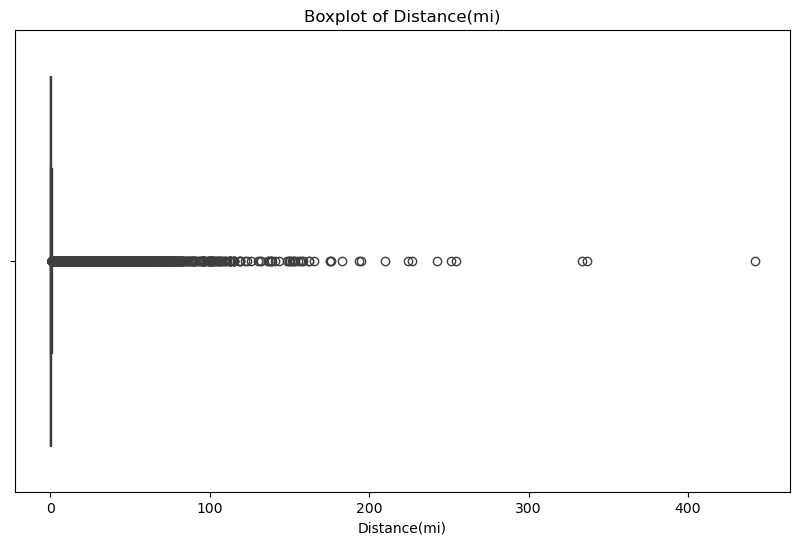

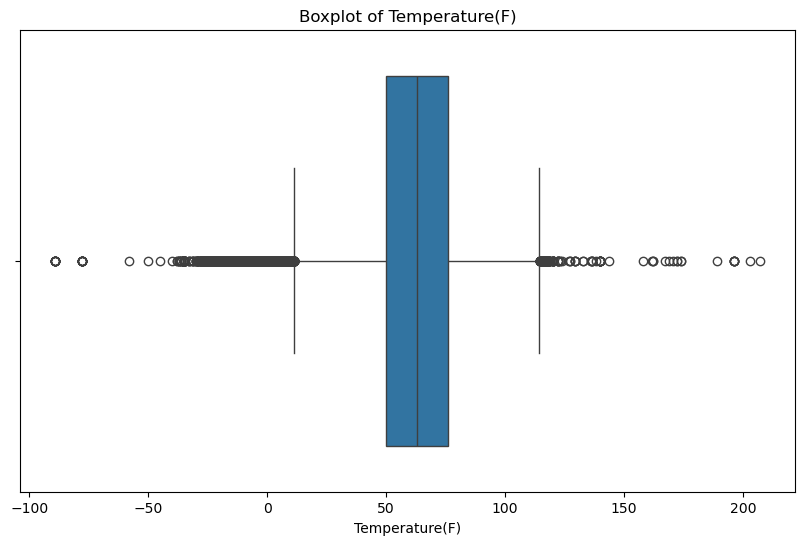

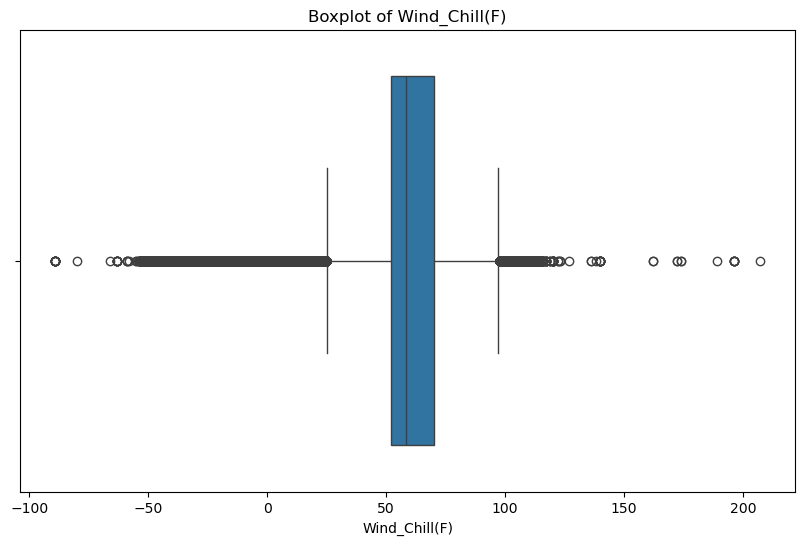

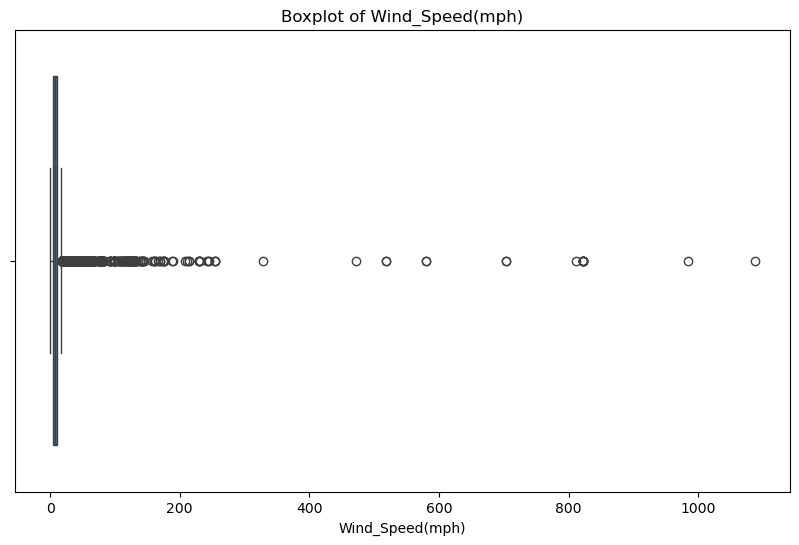

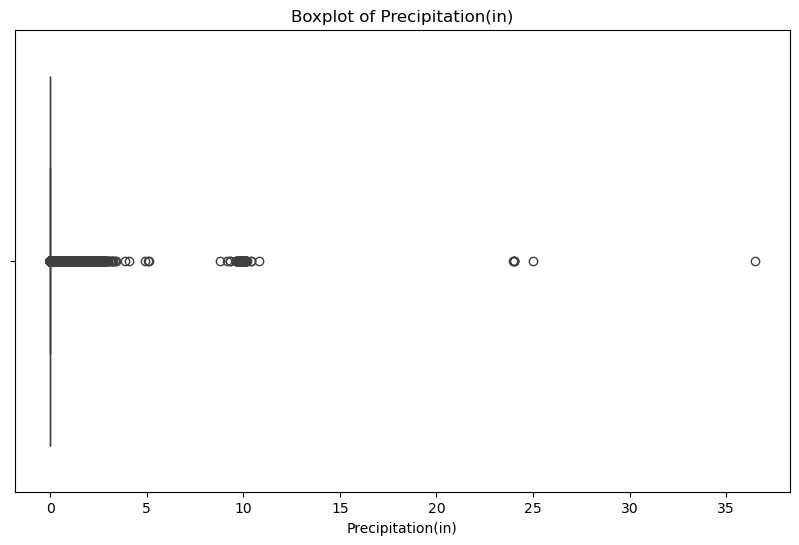

In [55]:
# Boxplots for outlier detection
columns = ['Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Wind_Speed(mph)', 'Precipitation(in)']
for col in columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=cardata[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [56]:
# Manually set upper and lower bounds for extreme values
cardata = cardata[(cardata['Temperature(F)'] <= 150)]
cardata = cardata[cardata['Wind_Speed(mph)'] <= 200]

In [57]:
# Review data after removal
print(cardata[['Temperature(F)', 'Wind_Speed(mph)']].describe())

       Temperature(F)  Wind_Speed(mph)
count    6.976702e+06     6.976702e+06
mean     6.168389e+01     7.639390e+00
std      1.872309e+01     5.047350e+00
min     -8.900000e+01     0.000000e+00
25%      5.000000e+01     5.000000e+00
50%      6.300000e+01     7.000000e+00
75%      7.590000e+01     1.000000e+01
max      1.436000e+02     1.900000e+02


In [58]:
cardata.shape

(6976702, 39)

In [59]:
cardata.describe()

Severity                     Start_Time     Start_Lat  \
count  6.976702e+06                        6976702  6.976702e+06   
mean   2.229321e+00  2020-03-21 01:06:53.324289280  3.622684e+01   
min    1.000000e+00            2016-01-14 20:18:33  2.455480e+01   
25%    2.000000e+00  2018-09-14 23:35:54.750000128  3.342205e+01   
50%    2.000000e+00            2020-06-22 14:02:50  3.581519e+01   
75%    2.000000e+00            2021-10-27 18:03:03  4.009684e+01   
max    4.000000e+00            2023-03-31 23:30:00  4.900220e+01   
std    4.988572e-01                            NaN  5.056145e+00   

          Start_Lng  Distance(mi)  Temperature(F)  Wind_Chill(F)  \
count  6.976702e+06  6.976702e+06    6.976702e+06   6.976702e+06   
mean  -9.476837e+01  5.167481e-01    6.168389e+01   5.806268e+01   
min   -1.246238e+02  0.000000e+00   -8.900000e+01  -8.900000e+01   
25%   -1.172183e+02  0.000000e+00    5.000000e+01   5.200000e+01   
50%   -8.789704e+01  1.000000e-02    6.300000e+01   5.824746e+01   
75%   -8.038807e+01  3.870000e-01    7.590000e+01   7.000000e+01   
max   -6.711317e+01  4.417500e+02    1.436000e+02   1.400000e+02   
std    1.735515e+01  1.747539e+00    1.872309e+01   1.896884e+01   

        Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
count  6.976702e+06  6.976702e+06    6.976702e+06     6.976702e+06   
mean   6.501716e+01  2.956470e+01    9.114174e+00     7.639390e+00   
min    1.000000e+00  0.000000e+00    0.000000e+00     0.000000e+00   
25%    4.900000e+01  2.941000e+01    1.000000e+01     5.000000e+00   
50%    6.700000e+01  2.986000e+01    1.000000e+01     7.000000e+00   
75%    8.400000e+01  3.003000e+01    1.000000e+01     1.000000e+01   
max    1.000000e+02  5.863000e+01    1.400000e+02     1.900000e+02   
std    2.254250e+01  9.781021e-01    2.679566e+00     5.047350e+00   

       Precipitation(in)          Year         Month           Day  
count       6.976702e+06  6.976702e+06  6.976702e+06  6.976702e+06  
mean        6.079285e-03  2.019699e+03  6.748669e+00  1.575946e+01  
min         0.000000e+00  2.016000e+03  1.000000e+00  1.000000e+00  
25%         0.000000e+00  2.018000e+03  4.000000e+00  8.000000e+00  
50%         0.000000e+00  2.020000e+03  7.000000e+00  1.600000e+01  
75%         0.000000e+00  2.021000e+03  1.000000e+01  2.300000e+01  
max         3.647000e+01  2.023000e+03  1.200000e+01  3.100000e+01  
std         9.725118e-02  1.888491e+00  3.623119e+00  8.688103e+00

## Exporting Cleaned Dataset

In [68]:
path

'C:\\Users\\ariel\\OneDrive\\Desktop\\School work\\Achievement 6'

In [69]:
cardata.to_csv(os.path.join(path, 'Data','cardatacleaned.csv'))